## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(inputshape,output_units=10,n_neurons=[512,256,128,64]):
    input_layer=keras.layers.Input(inputshape)
    for i,n_units in enumerate(n_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    
    out=keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

In [23]:
"""Code Here
設定超參數
"""
LEARNING_RATE=[1e-3,1e-4]
EPOCHS=50
MOMENTOM=[.99,.5]
BATCH_SIZE=64
NESTEROV=[True,False]

In [24]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for N in NESTEROV:
    for lr in LEARNING_RATE:
        for m in MOMENTOM:
            print('Experiment with Nesterov=%s' % (N))
            print('Experiment with LR=%.6f' % (lr))
            print('Experiment with Momemtum=%.6f' % (m))
            keras.backend.clear_session()
            model=build_mlp(x_train.shape[1:])
            opt=keras.optimizers.SGD(lr=lr,nesterov=N,momentum=m)
            model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
            
            
            
            
            model.fit(x_train,y_train,
                     epochs=EPOCHS,
                     batch_size=BATCH_SIZE,
                     validation_data=(x_test,y_test),
                     shuffle=True)
            
            
            
            exp_name="exp_lr_%s_momen_%s_nes_%s" % (str(lr),str(m),str(N))
            results[exp_name]=model.history.history
                                                    

Experiment with Nesterov=True
Experiment with LR=0.001000
Experiment with Momemtum=0.990000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.8507 - acc: 0.3283 - val_loss: 1.6900 - val_acc: 0.3999
Epoch 2/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6284 - acc: 0.4162 - val_loss: 1.5679 - val_acc: 0.4415
Epoch 3/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.5436 - acc: 0.4470 - val_loss: 1.5177 - val_acc: 0.4605
Epoch 4/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.4897 - acc: 0.4668 - val_loss: 1.4852 - val_acc: 0.4732
Epoch 5/50
50000/50000 [==============================] - 12s 250us/step - loss: 1.4496 - acc: 0.4802 - val_loss: 1.4743 - val_acc: 0.4803
Epoch 6/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.4230 - acc: 0.4927 - val_loss: 1.4643 - val_acc: 0.4812
Epoch 7/50
50000/50000 [

50000/50000 [==============================] - 10s 206us/step - loss: 1.7029 - acc: 0.4021 - val_loss: 1.7127 - val_acc: 0.3903
Epoch 8/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.6766 - acc: 0.4119 - val_loss: 1.6729 - val_acc: 0.4138
Epoch 9/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.6517 - acc: 0.4216 - val_loss: 1.6538 - val_acc: 0.4138
Epoch 10/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6267 - acc: 0.4288 - val_loss: 1.6463 - val_acc: 0.4183
Epoch 11/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.6068 - acc: 0.4357 - val_loss: 1.6518 - val_acc: 0.4149
Epoch 12/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.5872 - acc: 0.4416 - val_loss: 1.6082 - val_acc: 0.4278
Epoch 13/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5682 - acc: 0.4476 - val_loss: 1.5934 - val_acc: 0.4378
Epoch 14/50
50000/50000 [=========

50000/50000 [==============================] - 11s 213us/step - loss: 1.2584 - acc: 0.5537 - val_loss: 1.3863 - val_acc: 0.5082
Epoch 15/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.2399 - acc: 0.5597 - val_loss: 1.3579 - val_acc: 0.5228
Epoch 16/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.2162 - acc: 0.5684 - val_loss: 1.3776 - val_acc: 0.5069
Epoch 17/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.1958 - acc: 0.5754 - val_loss: 1.3662 - val_acc: 0.5197
Epoch 18/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.1810 - acc: 0.5781 - val_loss: 1.3684 - val_acc: 0.5207
Epoch 19/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.1629 - acc: 0.5880 - val_loss: 1.3840 - val_acc: 0.5126
Epoch 20/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.1398 - acc: 0.5943 - val_loss: 1.3591 - val_acc: 0.5257
Epoch 21/50
50000/50000 [=======

50000/50000 [==============================] - 12s 247us/step - loss: 1.8761 - acc: 0.3355 - val_loss: 1.8774 - val_acc: 0.3347
Epoch 22/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.8681 - acc: 0.3399 - val_loss: 1.8699 - val_acc: 0.3408
Epoch 23/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.8605 - acc: 0.3433 - val_loss: 1.8613 - val_acc: 0.3431
Epoch 24/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.8533 - acc: 0.3456 - val_loss: 1.8543 - val_acc: 0.3434
Epoch 25/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.8464 - acc: 0.3500 - val_loss: 1.8479 - val_acc: 0.3484
Epoch 26/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.8399 - acc: 0.3513 - val_loss: 1.8410 - val_acc: 0.3518
Epoch 27/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.8335 - acc: 0.3553 - val_loss: 1.8349 - val_acc: 0.3500
Epoch 28/50
50000/50000 [=======

50000/50000 [==============================] - 11s 218us/step - loss: 1.0989 - acc: 0.6047 - val_loss: 1.4604 - val_acc: 0.5128
Epoch 29/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.0565 - acc: 0.6180 - val_loss: 1.4519 - val_acc: 0.5110
Epoch 30/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.0570 - acc: 0.6202 - val_loss: 1.4300 - val_acc: 0.5176
Epoch 31/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.0351 - acc: 0.6267 - val_loss: 1.4481 - val_acc: 0.5133
Epoch 32/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.0216 - acc: 0.6330 - val_loss: 1.4655 - val_acc: 0.5069
Epoch 33/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.0205 - acc: 0.6316 - val_loss: 1.4525 - val_acc: 0.5141
Epoch 34/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.9995 - acc: 0.6391 - val_loss: 1.4699 - val_acc: 0.5175
Epoch 35/50
50000/50000 [=======

Epoch 36/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.2847 - acc: 0.5463 - val_loss: 1.3999 - val_acc: 0.4989
Epoch 37/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.2759 - acc: 0.5476 - val_loss: 1.3962 - val_acc: 0.4997
Epoch 38/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.2676 - acc: 0.5521 - val_loss: 1.3989 - val_acc: 0.4943
Epoch 39/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.2586 - acc: 0.5556 - val_loss: 1.4220 - val_acc: 0.4918
Epoch 40/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.2480 - acc: 0.5573 - val_loss: 1.4282 - val_acc: 0.4951
Epoch 41/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.2411 - acc: 0.5612 - val_loss: 1.3998 - val_acc: 0.4976
Epoch 42/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.2323 - acc: 0.5648 - val_loss: 1.3896 - val_acc: 0.5070
Epoch 43/50
50000/50000 [==

Epoch 44/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.8342 - acc: 0.7033 - val_loss: 1.4518 - val_acc: 0.5274
Epoch 45/50
50000/50000 [==============================] - 9s 190us/step - loss: 0.8114 - acc: 0.7108 - val_loss: 1.4492 - val_acc: 0.5318
Epoch 46/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.7858 - acc: 0.7195 - val_loss: 1.4107 - val_acc: 0.5405
Epoch 47/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.7797 - acc: 0.7212 - val_loss: 1.4367 - val_acc: 0.5406
Epoch 48/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.7602 - acc: 0.7301 - val_loss: 1.4630 - val_acc: 0.5351
Epoch 49/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.7806 - acc: 0.7212 - val_loss: 1.5572 - val_acc: 0.5144
Epoch 50/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.7561 - acc: 0.7287 - val_loss: 1.4990 - val_acc: 0.5383
Experiment with Nesterov=Fa

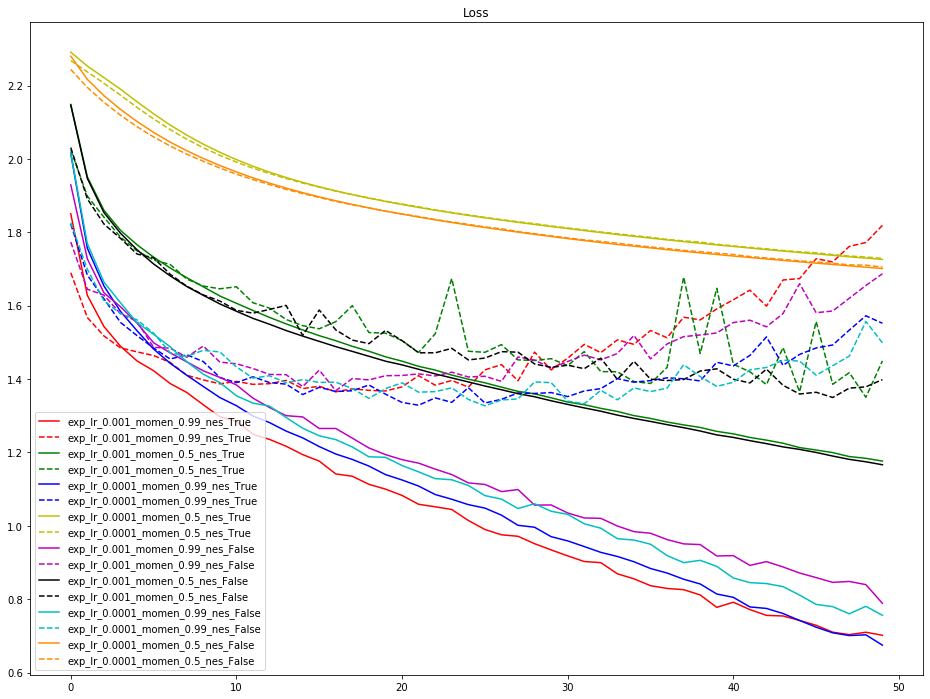

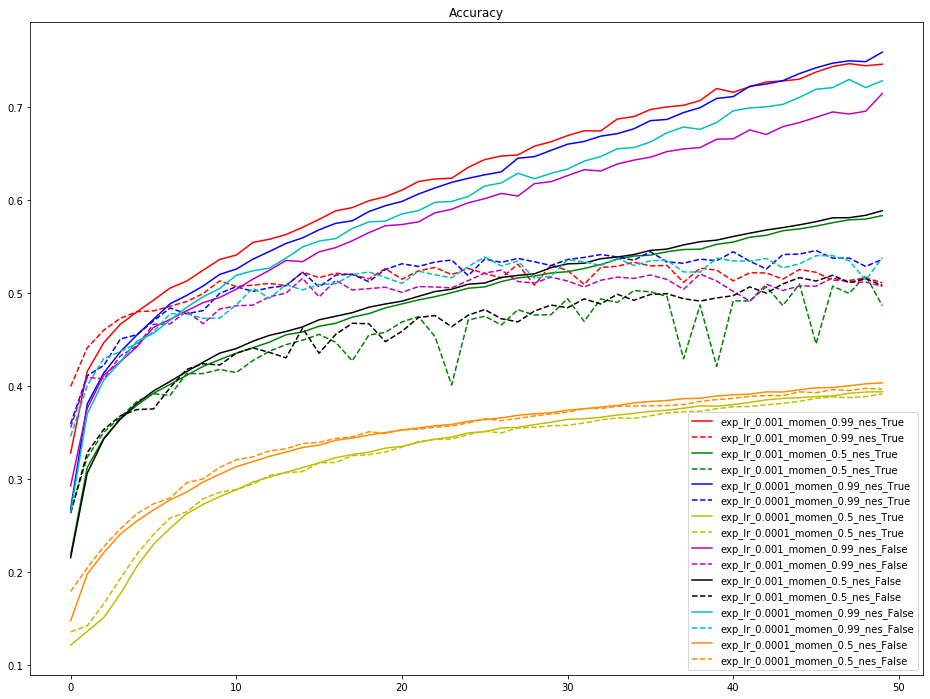

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange"]

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['loss'])),results[con]['loss'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_loss'])),results[con]['val_loss'], '--', label=con, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['acc'])),results[con]['acc'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_acc'])),results[con]['val_acc'], '--', label=con, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()